# HRNet for MARS Tutorial

This notebook will walk through using the [HRNet pose estimator](https://github.com/leoxiaobin/deep-high-resolution-net.pytorch) with the [data](https://data.caltech.edu/records/2011) used in the [Mouse Action Recognition System](https://www.biorxiv.org/content/10.1101/2020.07.26.222299v1).

## 0. Set up your environment

Clone this repository. 

Follow the instructions [here](https://github.com/leoxiaobin/deep-high-resolution-net.pytorch). Specifically, in the conda environment that you want to run this pose estimator, complete steps 1, 3, 4, 6, 7 under Installation in Quick Setup.

Also make an `annotations` directory.

Then, download the MARS COCO Evaluation tools [here](https://github.com/neuroethology/MARS_pycocotools) in that same environment.

Your root directory should look like this before running the model:
```
{PROJECT ROOT}
├── HRNet_MARS_tutorial.ipynb
├── LICENSE
├── annotations
├── data
├── data_utils
├── experiments
├── lib
├── log
├── models
├── output
├── project_config.yaml
├── requirements.txt
└── tools
```

## 1. Obtain the data 

Visit [this link](https://data.caltech.edu/records/2011) and download the data. As a reminder, you can `wget https://data.caltech.edu/records/2011` to download the data directly into the directory of your choice.

We will be using two configuration files, one for general information about your data, and the other for training the model and model parameters. The first is called `project_config.yaml` in the root of your project directory. The other will be in `experiments/mars`. 
1. Make sure you fill out `project_config.yaml` to fit your data. You will need to add the file name of your manifest file, and move that manifest file to the `annotations` directory. 
2. Also, add the images referred to in the manifest file into `annotations/raw_images`. 

## 2. Process and format the data

After running the code cell below, organize the data like this, with `mars` residing in the `data` directory:
```
mars
├── annotations
    ├── keypoints_[view]_test.json
    ├── keypoints_[view]_train.json
    └── keypoints_[view]_val.json
├── images
    ├── MARS_[view]_00000.jpg
    ├── MARS_[view]_00001.jpg
    ├── MARS_[view]_00002.jpg
    ├── MARS_[view]_00003.jpg
    ├── MARS_[view]_00004.jpg
    └── ...
```
(For MARS, [view] corresponds to either front or top.)

In [1]:
import data_utils.process_keypoints as process_data

project = '/home/ubuntu/Desktop/ericykma/hrnet_notebook/HRNet_for_MARS'
process_data.process_all_keypoints(project)

## 3. Train the model. 

Place your config files in `experiments/mars`. See `example_config.yaml` for an example.

Then, run `python tools/train.py experiments/mars/example_config.yaml` in the root of your project directory, replacing `example_config.yaml` with your config file to train your model.

You can view training and validation loss/accuracy curves using `python -m tensorboard.main --logdir=log` to tune your model.

You can also use the below visualization code to view model output examples. It uses predictions and ground truth annotations corresponding to the images in `DATASET.TEST_SET` in your configuration file, so be sure to correspond to those image numbers/IDs. You have the option to save the image in the `results` directory in the directory in `output` that corresponds to your configuration file.

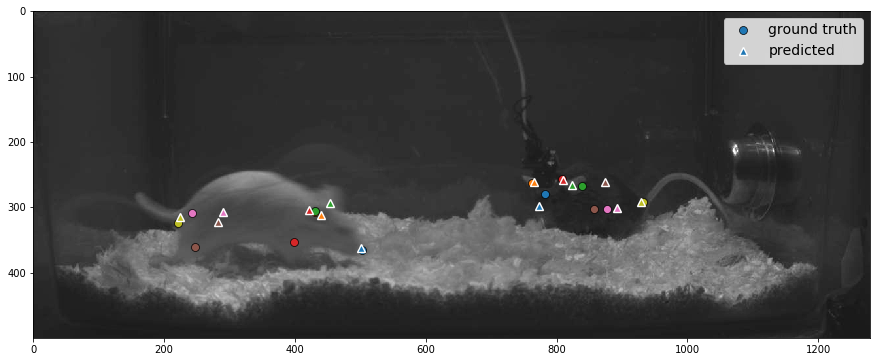

<Figure size 432x288 with 0 Axes>

In [7]:
import data_utils.visualize as visualize

visualize.plot_frame(project='/home/ubuntu/Desktop/ericykma/hrnet_notebook/HRNet_for_MARS', 
                    config_file='experiments/mars/w48_256x192_adam_lr1e-3_imagenet_pretrain.yaml',
                    frame_num=13999,
                    save=True
                    )

## 4. Test your model

You can run `python tools/test.py experiments/mars/example_config.yaml` to test your model. It will test the file under `DATASET.TEST_SET`, so if you are ready to evaluate your model on the test set, change that parameter to `test`.